# Random Dot Product Graph (RDPG) Model

In [1]:
import graspologic

import numpy as np
%matplotlib inline

RDPG is a latent position generative model, in which the probability of an edge existing between pairs of vertices is determined by the dot product of the associated latent position vectors. In other words, given $X \in \mathbb{R}^{n\times d}$, where $n$ is the number of vertices and $d$ is the dimensionality of each vector, the probability matrix $P$ is given by:

$$ P = X X^T $$

Both ER and SBM models can be formulated as a RDPG. Below, we sample $ER_{NP}(100, 0.5)$ using RDPG formulation. In this case, we set $X \in \mathbb{R}^{100\times 2}$ where all the values in $X$ is 0.5. This results in $P$ matrix where all the probabilities are also 0.5.

In [2]:
from graspologic.simulations import rdpg

# Create a latent position matrix
X = np.full((100, 2), 0.5)
print(X @ X.T)

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


In [3]:
A = rdpg(X)

## Visualize the adjacency matrix

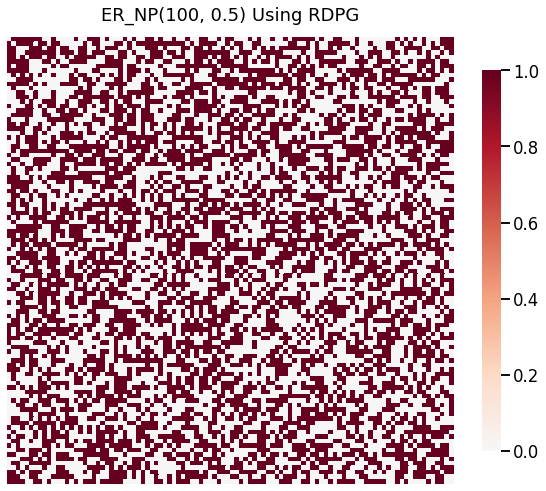

In [4]:
from graspologic.plot import heatmap

_ = heatmap(A, title='ER_NP(100, 0.5) Using RDPG')

## Stochastic block model as RDPG

We can formulate the following 2-block SBM parameters as RDPG, where the latent positions live in $\mathbb{R}^3$.

\begin{align*}
n &= [50, 50]\\
p &= \begin{bmatrix}0.33 & 0.09\\
0.09 & 0.03
\end{bmatrix}
\end{align*}

as

\begin{align*}
X &= \begin{bmatrix}0.5 & 0.2 & 0.2\\
& \vdots & \\
0.1 & 0.1 & 0.1\\
& \vdots & 
\end{bmatrix}\\
P &= XX^T
\end{align*}

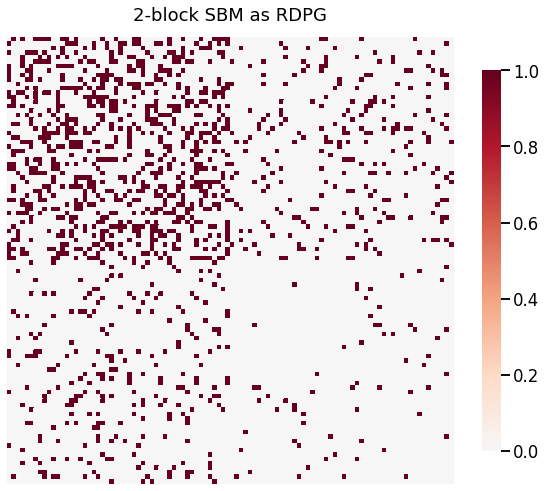

In [5]:
X = np.array([[0.5, 0.2, 0.2]] * 50 + [[0.1, 0.1, 0.1]] * 50)
A_rdpg = rdpg(X, loops=False)
_ = heatmap(A_rdpg, title='2-block SBM as RDPG')

### Results from SBM simulation using same formulation shows similar structure

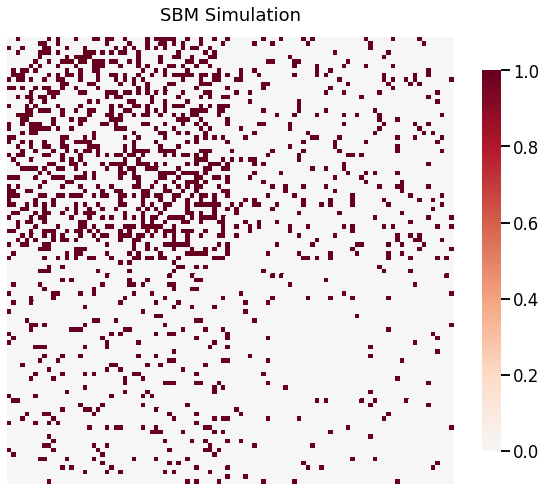

In [6]:
from graspologic.simulations import sbm

n = [50, 50]
p = [[0.33, 0.09], [0.09, 0.03]]

A_sbm = sbm(n, p)
_ = heatmap(A_sbm, title = 'SBM Simulation')